## Data Quality and checks

##### Loading the dataset saved earlier and analysis to generate insights

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\borrasai\Documents\airbnb.csv')

In [6]:
df.head()

,listing_id,calender_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,description,...,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,host_about,total_reviews
0,50904,166029.33,0.0,166.67,158.67,1.00,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,...,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0
1,891884,30099.00,0.0,175.00,175.00,1.67,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,This second floor suite with a splendid square...,...,1 private bath,1.0,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,2.0
2,891907,202081.33,1.0,215.00,215.00,3.00,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,"While entering this well located flat, you'll ...",...,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,6.0
3,2543695,114260.67,1.0,200.00,200.00,2.00,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,"While entering this well located flat, you'll ...",...,1.5 baths,2.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...,15.0
4,116134,173487.67,1.0,150.00,150.00,2.00,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,...,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,Paul,2011-05-14,"Kapellen, Flanders, Belgium",My wife Gina and I will be glad to welcome you...,120.0


In [7]:
df.shape

(1748, 25)

In [8]:
df.columns

Index(['listing_id', 'calender_id', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'listing_url', 'name',
       'description', 'latitude', 'longitude', 'property_type', 'room_type',
       'accomodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'total_reviews'],
      dtype='object')

#### Dropping unwanted column

In [9]:
df.drop(['calender_id'], axis = 1, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1748 non-null   int64  
 1   available       1748 non-null   float64
 2   price           1748 non-null   float64
 3   adjusted_price  1748 non-null   float64
 4   minimum_nights  1748 non-null   float64
 5   maximum_nights  1748 non-null   float64
 6   listing_url     1748 non-null   object 
 7   name            1748 non-null   object 
 8   description     1678 non-null   object 
 9   latitude        1748 non-null   float64
 10  longitude       1748 non-null   float64
 11  property_type   1748 non-null   object 
 12  room_type       1748 non-null   object 
 13  accomodates     1748 non-null   int64  
 14  bathrooms_text  1748 non-null   object 
 15  bedrooms        1620 non-null   float64
 16  beds            1707 non-null   float64
 17  amenities       1748 non-null   o

<AxesSubplot:>

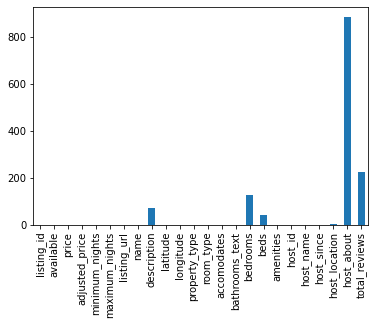

In [12]:
df.isna().sum().plot(kind = 'bar')

#### Dropping host_about as we have more than 800 null values

In [13]:
df.drop(['host_about'], axis = 1, inplace = True)

#### Looking for missing values in every row

<AxesSubplot:>

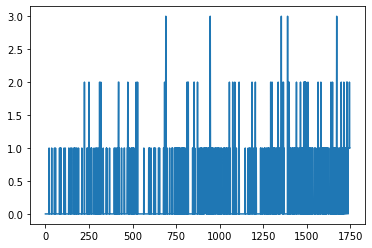

In [17]:
df.isna().sum(axis=1).plot()

In [18]:
#Dropping rows with more than 4 missing values

df = df[df.isna().sum(axis=1)<4]
df.reset_index(level = 0, inplace = True)
df.drop(['index'],axis =1, inplace = True)

In [23]:
df.shape

(1748, 23)

<AxesSubplot:>

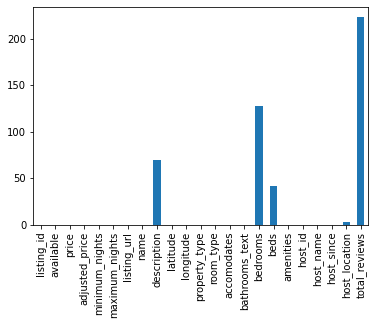

In [24]:
df.isna().sum().plot(kind= 'bar')

#### Replacing the rows with empty total_reviews for which we do not have any reviews

In [25]:
df['total_reviews'] = df['total_reviews'].fillna(0)

<AxesSubplot:>

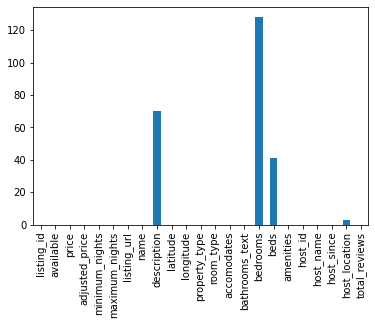

In [26]:
df.isna().sum().plot(kind='bar')

##### Dropping description column since the data is in text format

In [27]:
df.drop(['description'], axis=1, inplace=True)

#### Fixing data for bathrooms and beds columns

##### using groupby option on the categorical variable and find a data that gives good 'variance' for the bedrooms


<AxesSubplot:xlabel='property_type'>

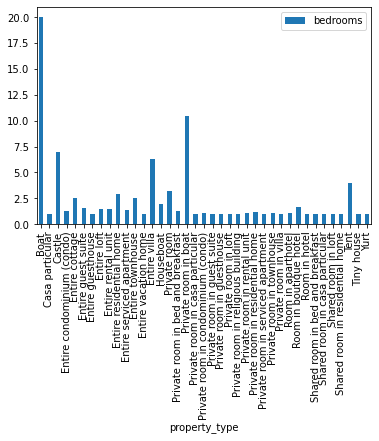

In [28]:
df.groupby('property_type').mean()[['bedrooms']].plot(kind='bar')

<AxesSubplot:xlabel='accomodates'>

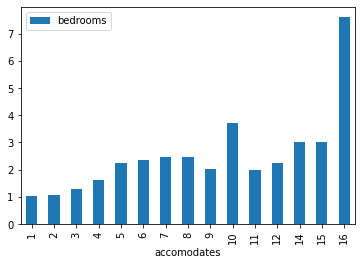

In [29]:
df.groupby('accomodates').mean()[['bedrooms']].plot(kind='bar')

<AxesSubplot:xlabel='room_type'>

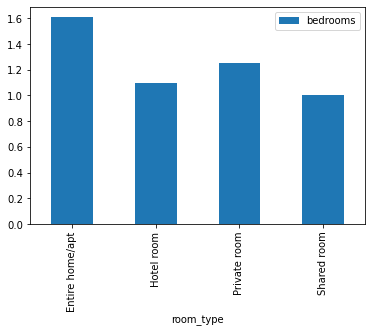

In [30]:
df.groupby('room_type').mean()[['bedrooms']].plot(kind='bar')

In [31]:
bdrm_dict = df.groupby('accomodates').mean()['bedrooms'].to_dict()

<AxesSubplot:>

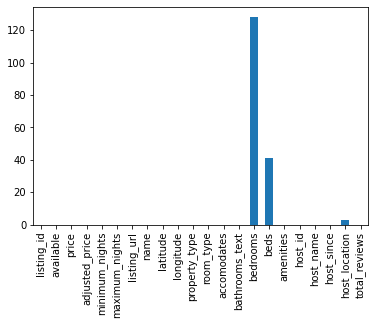

In [32]:
df.isna().sum().plot(kind='bar')

#### Indexing missing values

In [33]:
index = df[pd.isna(df.bedrooms)].index

In [35]:
missing_values = df[df['bedrooms'].isna()]['accomodates'].map(bdrm_dict)

In [37]:
missing_values.round(2)

81      1.60
89      1.06
90      1.06
107     1.06
114     1.06
        ... 
1639    1.06
1671    1.60
1701    1.60
1702    1.28
1745    1.06
Name: accomodates, Length: 128, dtype: float64

In [39]:
for i,j in enumerate(index):
    df.iloc[j,14] = missing_values.iloc[i]

<AxesSubplot:>

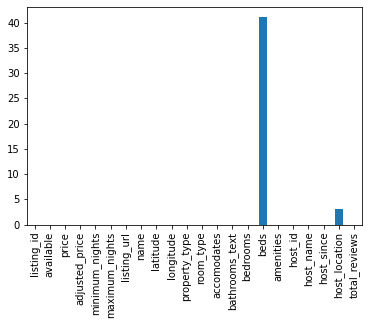

In [40]:
df.isna().sum().plot(kind='bar')

##### Following same approach for the beds column

In [41]:
bed_dict = df.groupby('bedrooms').mean()['beds'].to_dict()

<AxesSubplot:>

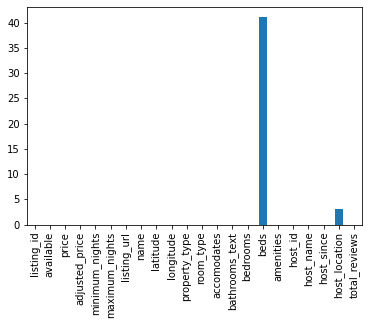

In [42]:
df.isna().sum().plot(kind='bar')

#### Indexing missing values

In [44]:
miss_index = df[pd.isna(df.beds)].index

##### Prediction of missing values



In [45]:
miss_values_predict = df[df['beds'].isna()]['bedrooms'].map(bed_dict)

In [47]:
miss_values_predict.round(2)

181      1.46
310      1.46
311      2.95
421      1.17
473      1.17
521      1.46
678      1.46
788      1.46
1056     1.17
1075     1.46
1077     1.46
1204     1.46
1247    16.25
1301     1.46
1354     4.36
1399     1.46
1405     1.46
1406     1.46
1441     1.46
1460     1.46
1462     1.46
1472     1.46
1474     1.46
1483     1.46
1486     1.46
1494     1.46
1505     1.46
1520     1.46
1549     1.46
1568     2.95
1605     1.46
1606     1.46
1621     1.46
1647     1.46
1648     1.46
1672     1.46
1698     2.95
1713     1.46
1720     1.46
1730     1.46
1732     2.95
Name: bedrooms, dtype: float64

In [48]:
for i,j in enumerate(miss_index):
    df.iloc[j,15] = miss_values_predict.iloc[i]

<AxesSubplot:>

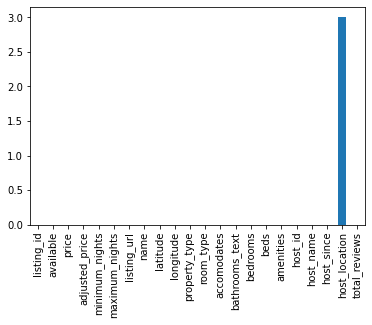

In [49]:
df.isna().sum().plot(kind='bar')

##### Since the entire data is around Belgium, we can drop the null data since it wont affect the prediction

In [50]:
blank_data = df['host_location'].notna()

In [51]:
df = df[blank_data]
df.reset_index(level=0, inplace=True)
df.drop(['index'], axis=1, inplace=True)

C:\Users\borrasai\AppData\Local\Temp/ipykernel_17832/61218006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'], axis=1, inplace=True)


<AxesSubplot:>

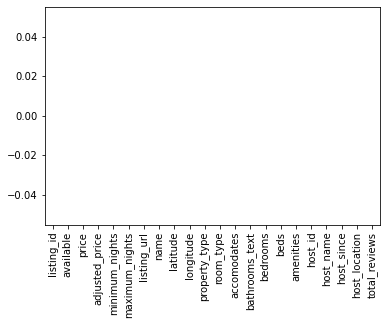

In [52]:
df.isna().sum().plot(kind='bar')

In [56]:
df

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,listing_url,name,latitude,longitude,...,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id,host_name,host_since,host_location,total_reviews
0,50904,0.0,166.67,158.67,1.00,60.0,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,51.218575,4.398631,...,2,1 private bath,1.000000,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0
1,891884,0.0,175.00,175.00,1.67,1125.0,https://www.airbnb.com/rooms/891884,aplace/antwerp: amazing suite & square view,51.218575,4.398631,...,2,1 private bath,1.000000,1.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",2.0
2,891907,1.0,215.00,215.00,3.00,1125.0,https://www.airbnb.com/rooms/891907,aplace/antwerp: stunning flat with square view,51.218575,4.398631,...,4,1.5 baths,2.000000,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",6.0
3,2543695,1.0,200.00,200.00,2.00,1125.0,https://www.airbnb.com/rooms/2543695,aplace/antwerp: gorgeous flat with square view,51.218575,4.398631,...,4,1.5 baths,2.000000,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Ha...",234077,Karin,2010-09-14,"Antwerp, Flanders, Belgium",15.0
4,116134,1.0,150.00,150.00,2.00,1125.0,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,51.230510,4.405930,...,4,2.5 baths,2.000000,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,Paul,2011-05-14,"Kapellen, Flanders, Belgium",120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,53913552,1.0,50.00,50.00,1.00,365.0,https://www.airbnb.com/rooms/53913552,Fantastische loft om in te vertoeven met parking,51.218570,4.435350,...,2,1 bath,1.000000,1.0,"[""Long term stays allowed"", ""Kitchen"", ""Smoke ...",164785425,Yassin,2017-12-29,"Kontich, Flanders, Belgium",0.0
1741,53916524,1.0,88.00,88.00,3.00,365.0,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,51.231330,4.403520,...,2,1.5 baths,1.000000,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712,Michael,2015-10-11,"Antwerp, Flanders, Belgium",0.0
1742,53928545,1.0,49.00,49.00,20.00,1125.0,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,51.213210,4.397080,...,2,1 bath,1.055402,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936,Jürgen,2016-05-27,"Waalwijk, North Brabant, Netherlands",0.0
1743,53949105,1.0,990.00,990.00,2.00,1125.0,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,51.212320,4.482230,...,16,7.5 baths,7.000000,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714,Kelly,2020-11-30,BE,0.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1745 non-null   int64  
 1   available       1745 non-null   float64
 2   price           1745 non-null   float64
 3   adjusted_price  1745 non-null   float64
 4   minimum_nights  1745 non-null   float64
 5   maximum_nights  1745 non-null   float64
 6   listing_url     1745 non-null   object 
 7   name            1745 non-null   object 
 8   latitude        1745 non-null   float64
 9   longitude       1745 non-null   float64
 10  property_type   1745 non-null   object 
 11  room_type       1745 non-null   object 
 12  accomodates     1745 non-null   int64  
 13  bathrooms_text  1745 non-null   object 
 14  bedrooms        1745 non-null   float64
 15  beds            1745 non-null   float64
 16  amenities       1745 non-null   object 
 17  host_id         1745 non-null   i

### Numeric columns


In [59]:
df.describe().round(2)

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,accomodates,bedrooms,beds,host_id,total_reviews
count,1745.00,1745.00,1745.00,1745.00,1745.00,1745.00,1745.00,1745.00,1745.00,1745.00,1745.00,1.745000e+03,1745.00
mean,34854083.70,0.50,117.73,117.31,5.39,813.90,51.21,4.41,3.76,1.51,2.22,1.419511e+08,36.01
std,15241560.02,0.50,200.99,200.25,21.48,518.12,0.01,0.02,2.77,1.06,2.23,1.287334e+08,62.08
min,50904.00,0.00,14.00,14.00,1.00,1.00,51.16,4.29,1.00,1.00,1.00,2.340770e+05,0.00
25%,23372858.00,0.00,60.00,60.00,1.00,365.00,51.21,4.40,2.00,1.00,1.00,2.875771e+07,3.00
50%,38898289.00,0.67,80.00,80.00,2.00,1125.00,51.22,4.41,3.00,1.00,2.00,1.033633e+08,13.00
75%,48389543.00,1.00,112.33,112.33,3.00,1125.00,51.22,4.42,4.00,2.00,3.00,2.354916e+08,40.00
max,53983318.00,1.00,5800.00,5800.00,500.00,9999.00,51.35,4.48,16.00,20.00,44.00,4.373093e+08,648.00


<AxesSubplot:xlabel='property_type'>

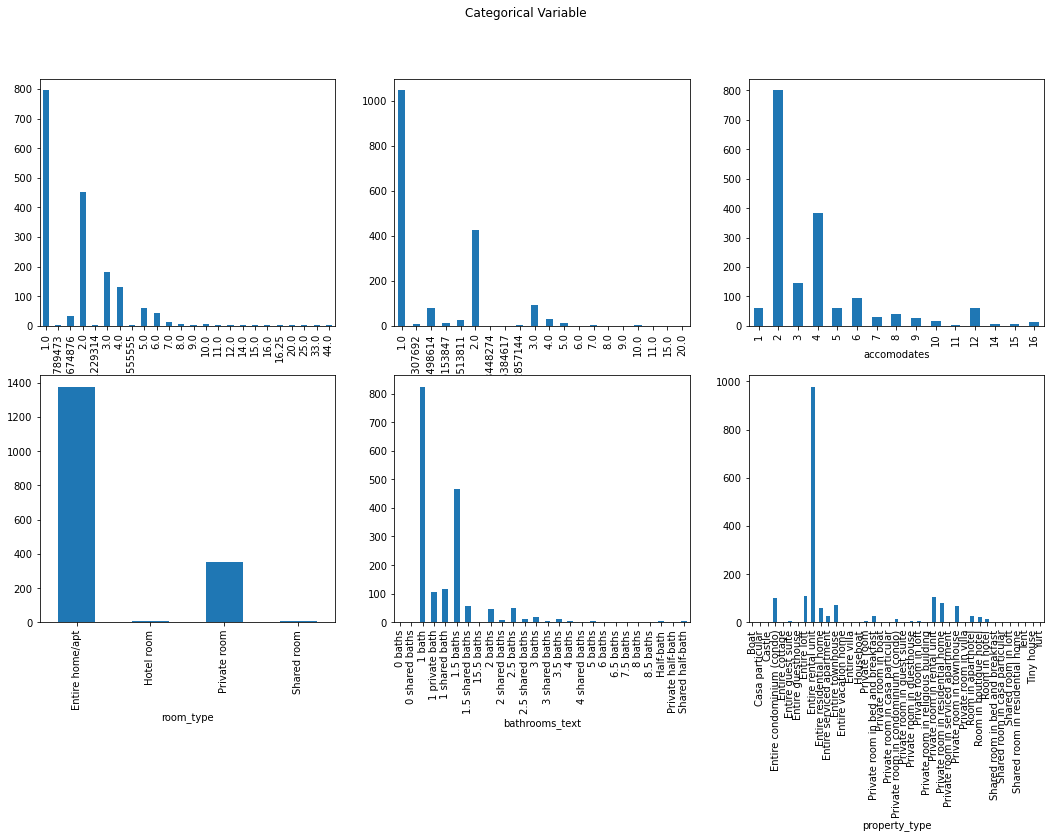

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Categorical Variable')

df.groupby('beds').count()['listing_id'].plot(kind='bar',ax=axes[0, 0])
df.groupby('bedrooms').count()['listing_id'].plot(kind='bar',ax=axes[0, 1])
df.groupby('accomodates').count()['listing_id'].plot(kind='bar',ax=axes[0, 2])
df.groupby('room_type').count()['listing_id'].plot(kind='bar',ax=axes[1, 0])
df.groupby('bathrooms_text').count()['listing_id'].plot(kind='bar',ax=axes[1, 1])
df.groupby('property_type').count()['listing_id'].plot(kind='bar',ax=axes[1, 2])

##### Saving the clean dataframe to a csv. We will perform the profilling and feature engineering in next segment

In [62]:
df.to_csv('airbnb_cleaned.csv', index = False)